<a href="https://colab.research.google.com/github/zareefrj/Time-Series-Forecasting/blob/main/ARIMA_Waste_Prediction%20v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARIMA Forecasting**

Step 1: Visualizing the dataset

In [1]:
import pandas as pd
df=pd.read_csv('Waste04-21.csv',index_col='Date',parse_dates=True, dayfirst=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (5584, 1)


,Amount
Date,
2004-10-01,869869.0
2004-10-02,440.0
2004-10-03,0.0
2004-10-04,1510203.0
2004-10-05,1564604.0
...,...
2021-07-05,1897290.0
2021-07-06,1921640.0
2021-07-07,1553080.0


<Axes: xlabel='Date'>

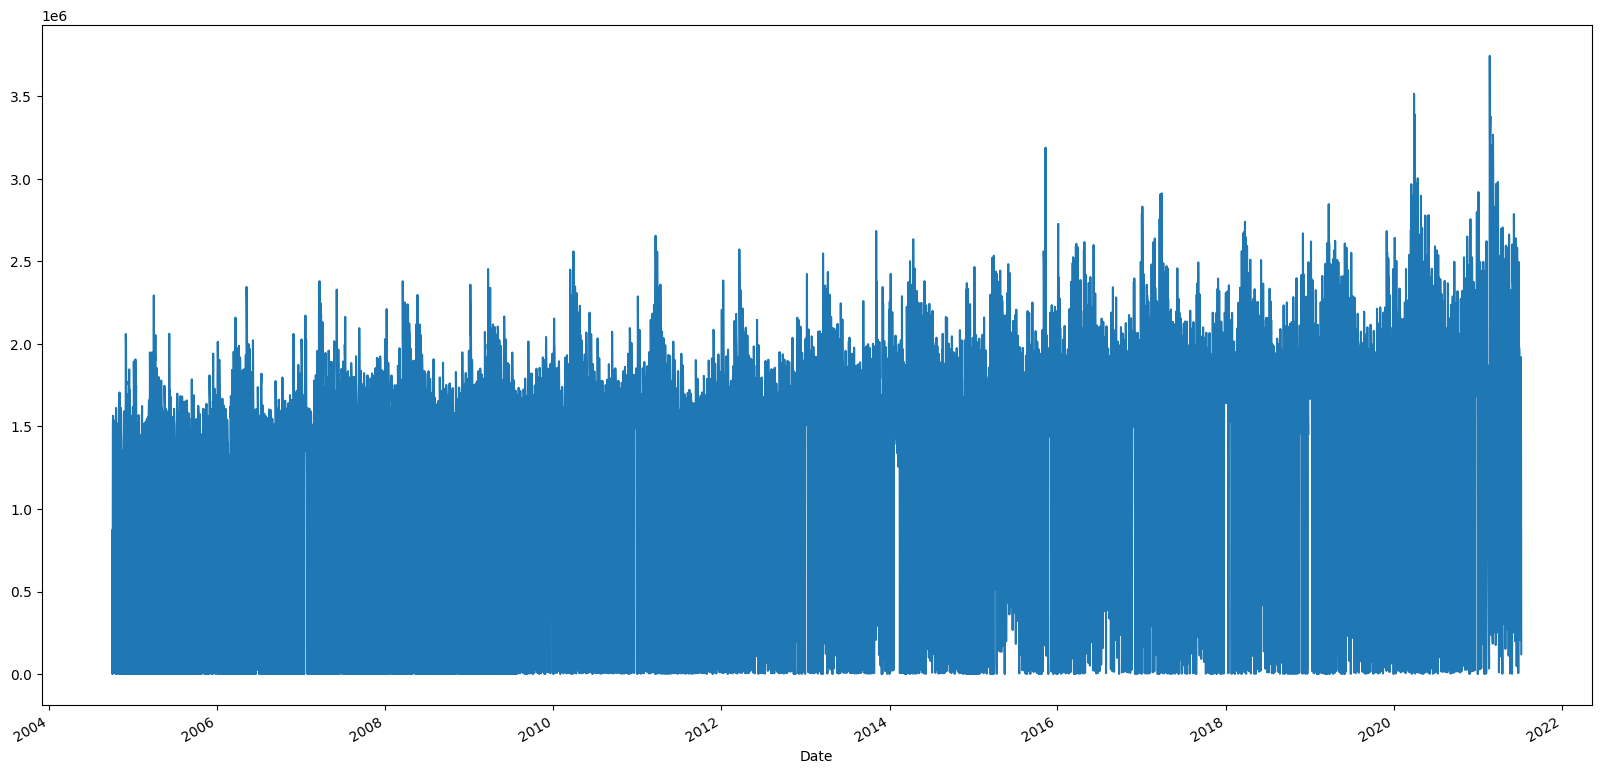

In [2]:
df['Amount'].plot(figsize=(20,10))

Step 2: Is the data set stationary?

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

     if dftest[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
     else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adf_test(df['Amount'])

1. ADF :  -4.761346151796717
2. P-Value :  6.444292404311751e-05
3. Num Of Lags :  33
4. Num Of Observations Used For ADF Regression: 5550
5. Critical Values :
	 1% :  -3.4315287976726645
	 5% :  -2.8620609124653655
	 10% :  -2.5670472803830857
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Step 3: Determine ARIMA Model

In [3]:
!pip install pmdarima
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Amount'], trace=True, suppress_warnings=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.5 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=170444.075, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=169705.739, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=170442.076, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=169386.568, Time=0.55 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=168944.971, Time=0.78 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=168770.443, Time=1.11 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=164187.572, Time=1.25 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=163160.388, Time=6.58 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=166460.641, Time=3.54 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=163

Step 4: Splitting the data set into training & testing sets
A common practice is to use around 70-80% of the data for training and the remaining 20-30% for testing

In [4]:
print(df.shape)
size=int(len(df)*0.8) #training size
train=df.iloc[:size] #up to n
test=df.iloc[size:] #last n
print(train.shape,test.shape)

(5584, 1)
(4467, 1) (1117, 1)


Step 5: The ARIMA Model

In [16]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Amount'],order=(5,1,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                 4467
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -64861.531
Date:                Wed, 14 Jun 2023   AIC                         129745.061
Time:                        10:50:14   BIC                         129815.508
Sample:                             0   HQIC                        129769.893
                               - 4467                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3694      0.013    -28.871      0.000      -0.394      -0.344
ar.L2         -0.6226      0.018    -33.883      0.000      -0.659      -0.587
ar.L3         -0.6662      0.014    -46.829      0.000      -0.694      -0.638
ar.L4         -0.4037      0.016    -25.695      0.000      -0.434      -0.373
ar.L5         -0.7059      0.013    -55.944      0.000      -0.731      -0.681
ma.L1         -0.7330      0.018    -40.243      0.000      -0.769      -0.697
ma.L2          0.2344      0.023      9.994      0.000       0.188       0.280
ma.L3          0.0201      0.027      0.749      0.454      -0.033       0.073
ma.L4         -0.3949      0.025    -15.950      0.000      -0.443      -0.346
ma.L5          0.0518      0.016      3.176      0.001       0.020       0.084
sigma2      2.379e+11    3.6e-14   6.61e+24      0.000    2.38e+11    2.38e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               247.75
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.42e+40. Standard errors may be unstable.
"""

Step 5: Prediction on Test Set

In [17]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=df.index[start:end+1]
print(pred)

Date
2018-01-17    1.999168e+06
2018-01-18    2.193001e+06
2018-01-19    2.230499e+06
2018-01-20    2.161853e+06
2018-01-22    5.420408e+05
                  ...     
2021-07-05    1.767617e+06
2021-07-06    1.767617e+06
2021-07-07    1.767617e+06
2021-07-08    1.767617e+06
2021-07-09    1.767617e+06
Name: ARIMA Predictions, Length: 1117, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

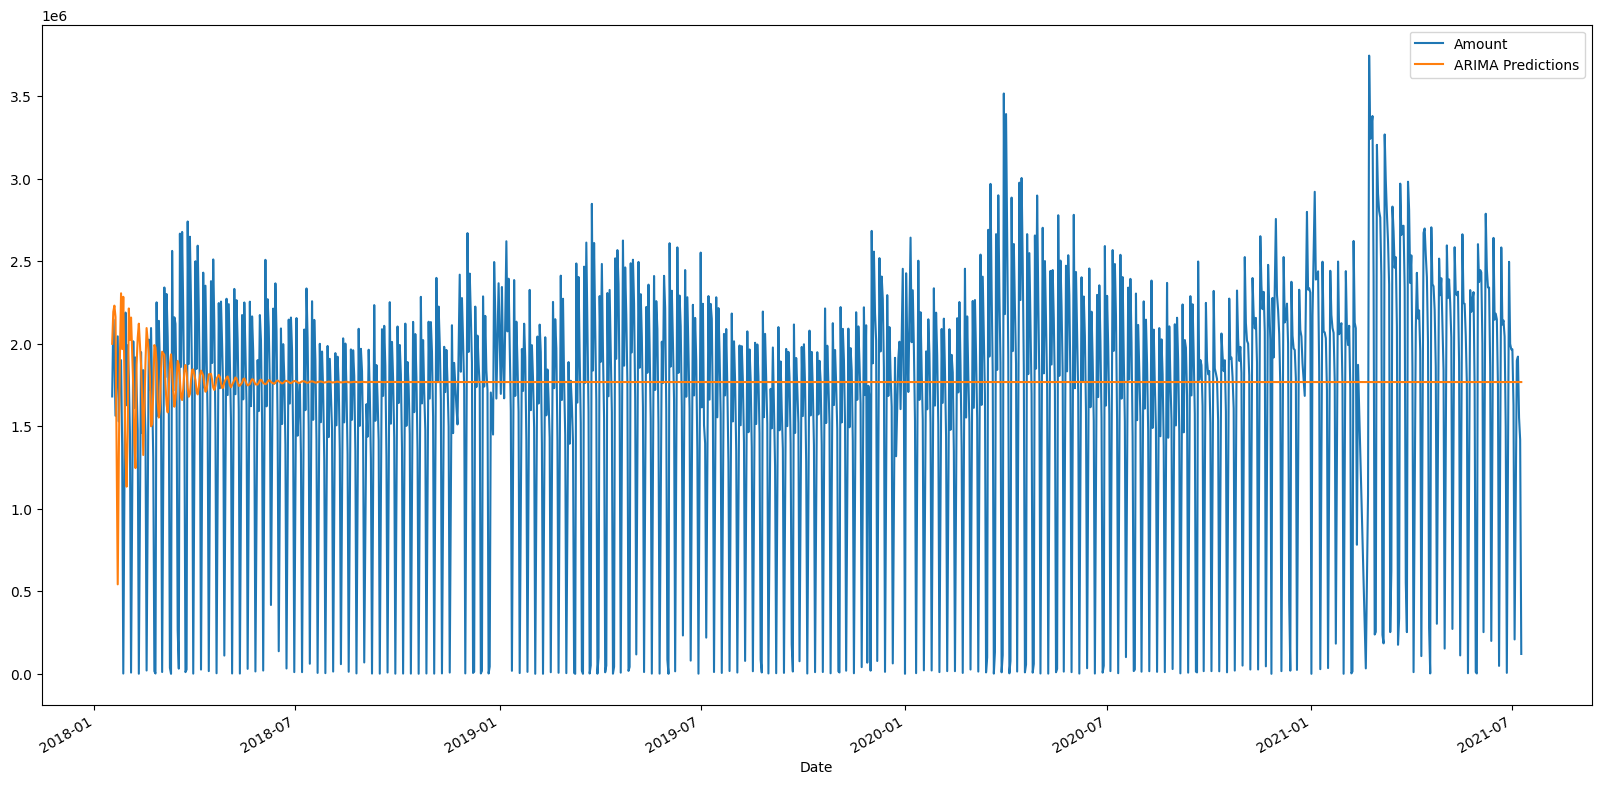

In [18]:
test['Amount'].plot(legend=True, figsize=(20,10))
pred.plot(legend=True, figsize=(20,10))

Check Model Accuracy

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Amount']))
print(rmse)

863542.3226755351


In [20]:
mean=test['Amount'].mean()
print(mean)
print(rmse*100/mean)

1625551.8751468218
53.12302460956768


Predicting the future

In [21]:
model2=ARIMA(df['Amount'],order=(5,1,5))
model2=model2.fit()
df.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Amount
Date,
2021-07-05,1897290.0
2021-07-06,1921640.0
2021-07-07,1553080.0
2021-07-08,1417650.0
2021-07-09,120340.0


In [22]:
index_future_dates=pd.date_range(start='2021-07-10',end='2021-08-09')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-07-10    1.150761e+06
2021-07-11    1.644493e+06
2021-07-12    2.234762e+06
2021-07-13    2.371286e+06
2021-07-14    2.071682e+06
2021-07-15    7.601622e+05
2021-07-16    8.019919e+05
2021-07-17    1.358324e+06
2021-07-18    2.037461e+06
2021-07-19    2.171367e+06
2021-07-20    2.192712e+06
2021-07-21    1.347285e+06
2021-07-22    9.019312e+05
2021-07-23    1.084508e+06
2021-07-24    1.770643e+06
2021-07-25    2.039135e+06
2021-07-26    2.152726e+06
2021-07-27    1.688033e+06
2021-07-28    1.186854e+06
2021-07-29    1.018604e+06
2021-07-30    1.492086e+06
2021-07-31    1.876333e+06
2021-08-01    2.077959e+06
2021-08-02    1.846967e+06
2021-08-03    1.452605e+06
2021-08-04    1.123813e+06
2021-08-05    1.315234e+06
2021-08-06    1.680895e+06
2021-08-07    1.969922e+06
2021-08-08    1.906285e+06
2021-08-09    1.638482e+06
Freq: D, Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

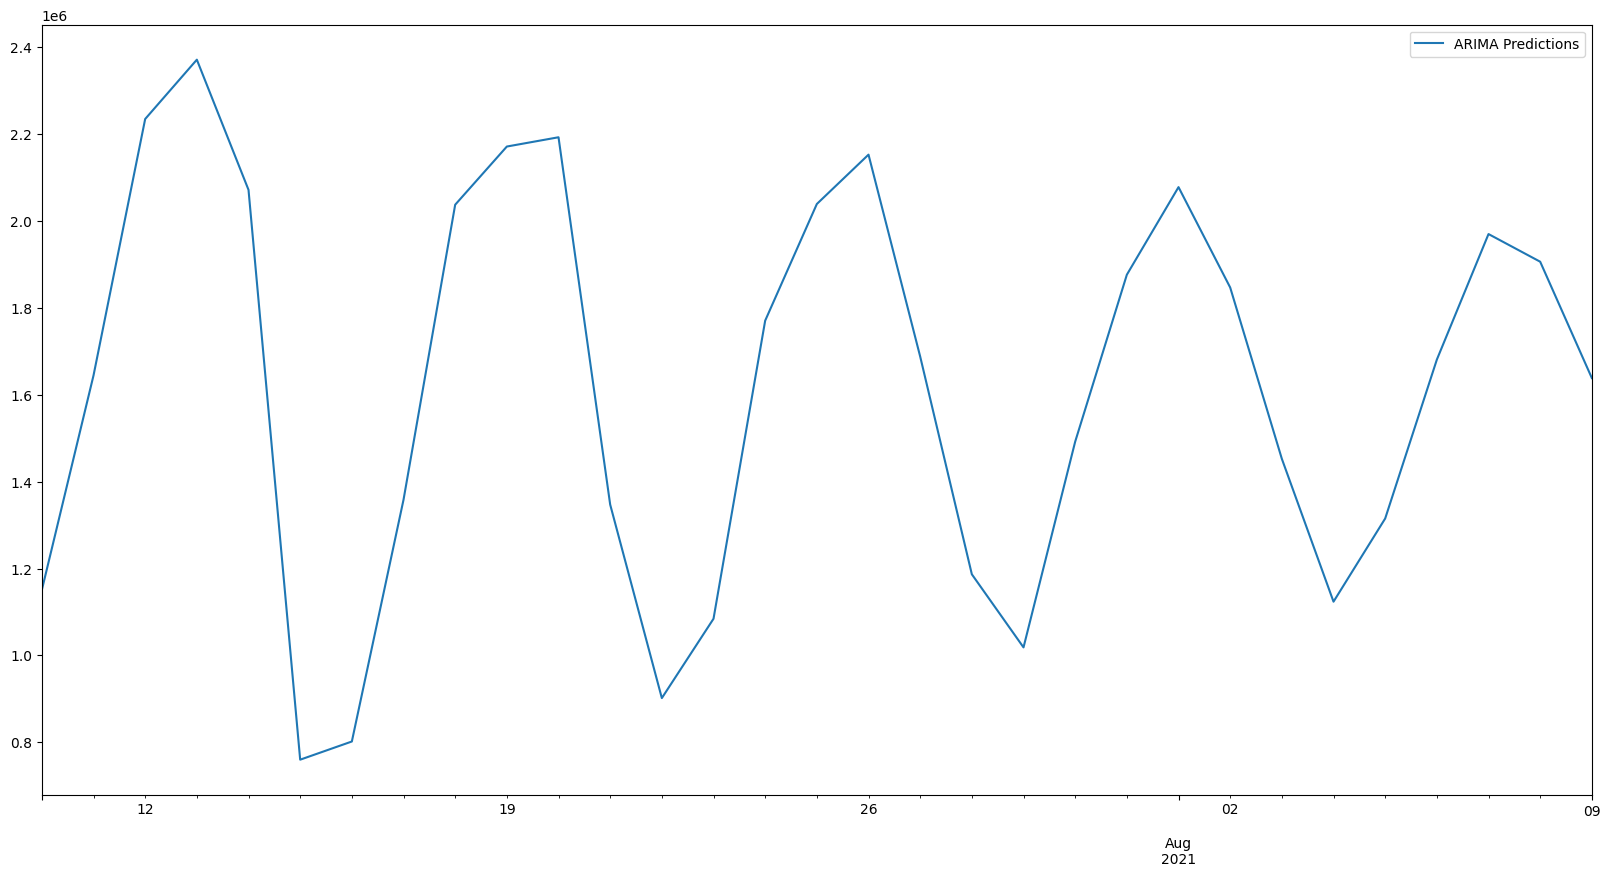

In [23]:
pred.plot(figsize=(20,10),legend=True)